In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/training.csv')

#after uploading training and test sets, we apply some transformations: 
#date divided into date and time
#delete HumidityRatio
#remove Light outliers

df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)
df.drop('Unnamed: 0',  axis=1,inplace=True)
#df.drop('HumidityRatio', axis=1,inplace=True)
df=df[df['Light']<1000] 

In [3]:
test=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/test.csv')

test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)
test.drop('Unnamed: 0',  axis=1,inplace=True)
#test.drop('HumidityRatio',inplace=True,axis=1)

In [4]:
df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holidays'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
y_name = 'Occupancy'

# Data Partitioning

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
attributes = ['Temperature','CO2','Light','Humidity'] 
    
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

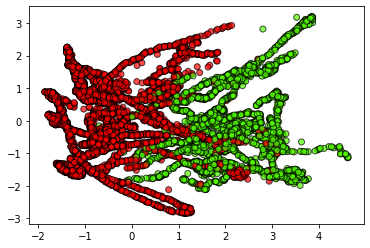

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Linear SVM

In [11]:
from sklearn.svm import LinearSVC

In [12]:
clf = LinearSVC(C=0.001,dual=False, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9871919584954605
F1-score [0.99161626 0.97288019]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [13]:
clf = LinearSVC(C=1.0,dual=False, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9892996108949417
F1-score [0.99300847 0.97720994]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [14]:
clf = LinearSVC(C=100.0,dual=False, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9892996108949417
F1-score [0.99300847 0.97720994]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [15]:
clf = LinearSVC(loss='hinge', C=0.01,class_weight='balanced', random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9855706874189365
F1-score [0.99054499 0.96955183]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.94      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [16]:
clf = LinearSVC(loss='hinge', C=1, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9896238651102465
F1-score [0.99322178 0.97788528]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
clf = LinearSVC(loss='hinge',C=100, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897859922178989
F1-score [0.99332839 0.9782233 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [19]:
support_vectors_pca = pca.transform(support_vectors)

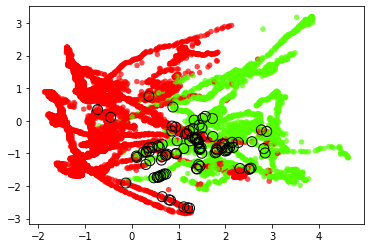

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Effect of C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


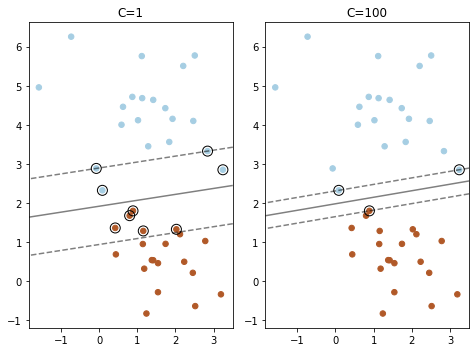

In [21]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [22]:
from sklearn.svm import SVC

In [23]:
clf = SVC(gamma='auto', C=0.01, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9865434500648509
F1-score [0.99118989 0.97152659]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [24]:
clf = SVC(gamma='auto', C=1, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9896238651102465
F1-score [0.9932189 0.9779158]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [25]:
clf = SVC(gamma='auto', C=100, random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9907587548638133
F1-score [0.9939625  0.98031088]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [26]:
clf = SVC(gamma='auto', C=100, kernel='sigmoid', random_state=55)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8955901426718548
F1-score [0.93225331 0.77243816]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4747
           1       0.78      0.77      0.77      1421

    accuracy                           0.90      6168
   macro avg       0.85      0.85      0.85      6168
weighted avg       0.90      0.90      0.90      6168



In [27]:
clf.support_

array([   26,    28,    38, ..., 14267, 14294, 14328], dtype=int32)

In [28]:
clf.support_vectors_[:10]

array([[-0.15523533,  2.74369934, -0.62501238, -0.2948196 ],
       [-0.11265385,  2.48246626, -0.62501238, -0.19410177],
       [ 2.95636704,  0.34800086,  0.52106313, -1.04013155],
       [-0.01802833,  2.60352549, -0.62501238,  0.99235427],
       [-0.19781681,  2.58759664, -0.62501238, -0.2948196 ],
       [ 2.82073713, -0.36879723,  0.53217467, -0.44690353],
       [-0.11265385,  2.50476664, -0.62501238, -0.19410177],
       [ 0.65381283, -0.17366886,  0.89766482,  0.24704232],
       [ 0.27531077,  1.97274318, -0.62501238,  1.719537  ],
       [-0.01802833,  1.59363663, -0.62501238,  1.6591063 ]])

In [29]:
clf.n_support_, len(X_train)

(array([751, 750], dtype=int32), 14384)

## Effect of Different Kernels

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: No contour levels were found within the data range.


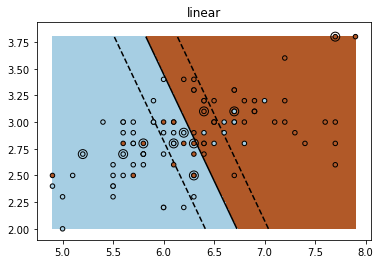

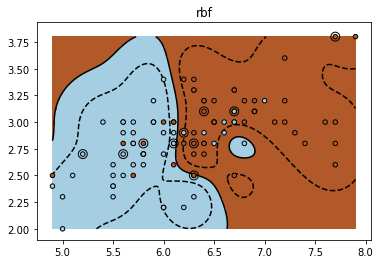

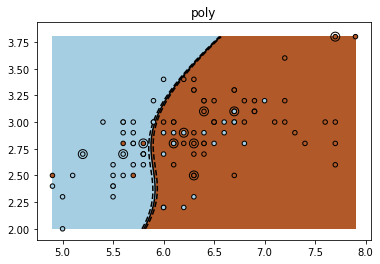

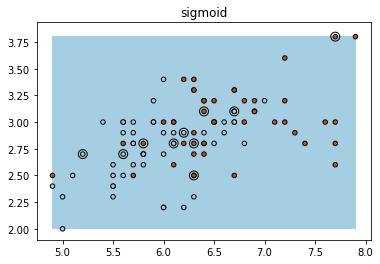

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly', 'sigmoid'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()